In [2]:
import sys
import os
import math
from math import pi
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.fftpack import fft, ifft

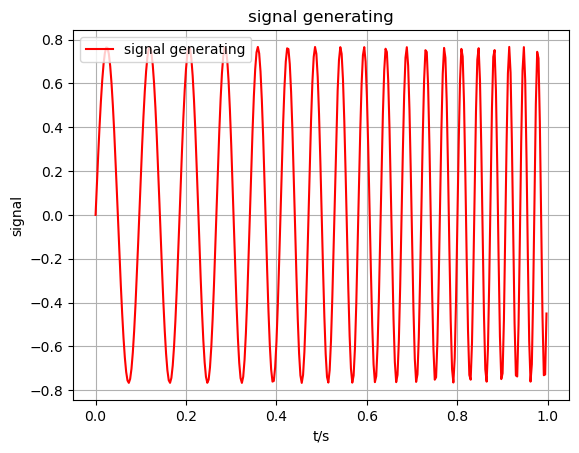

In [3]:
def signal(t,snr,coeff):
    phi=t*coeff[0]+coeff[1]*t**2+coeff[2]*t**3
    signal=np.sin(2*pi*phi)
    norm=np.sqrt(sum(signal*signal))
    return snr*signal/norm
tmax=1
snr=10
coeff=np.array([10,3,6])
max_freq=coeff[0]+coeff[1]*2*tmax+coeff[2]*3*tmax**2
nyq_freq=2*max_freq
samp_freq=5*nyq_freq
samp_intrv=1/samp_freq
t=np.arange(0,1,samp_intrv)
Num=len(t)
sig=signal(t,snr,coeff)
plt.plot(t,sig,'r',label="signal generating")
plt.grid(True)
plt.xlabel("t/s")
plt.ylabel("signal")
plt.legend(loc='upper left')
plt.title("signal generating")
plt.show()



-2


/home/tianyu/.julia/conda/3/envs/few_env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


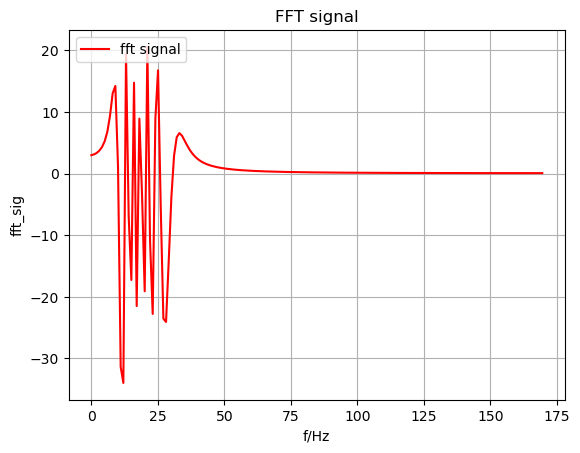

In [4]:
print(math.floor(-1.1))
data_len=t[-1]-t[0]
k_nyq=math.floor(Num/2)+1
pos_freq=np.arange(0,k_nyq-1)*(1/data_len)
fft_sig=fft(sig)
fft_sig=fft_sig[1:k_nyq]
plt.plot(pos_freq,fft_sig,'r',label="fft signal")
plt.grid(True)
plt.xlabel("f/Hz")
plt.ylabel("fft_sig")
plt.legend(loc='upper left')
plt.title("FFT signal")
plt.show()


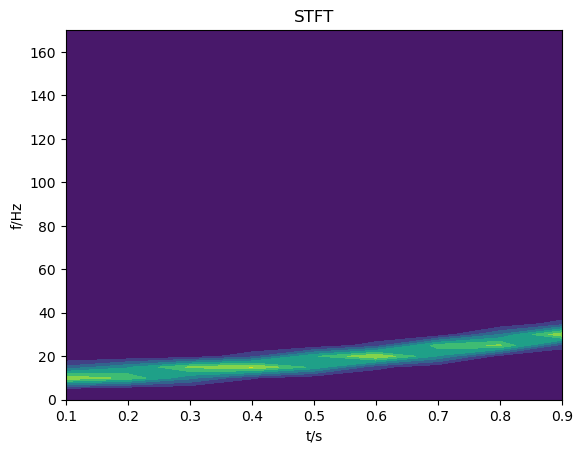

In [7]:
win_len=0.2#sec
ovrlp=0.1#sec
win_len_samp=int(np.floor(win_len*samp_freq))
ovrlp_samp=int(np.floor(ovrlp*samp_freq))
from scipy.signal import spectrogram
f,T,S=spectrogram(sig,samp_freq,'hamming',nperseg=win_len_samp,noverlap=ovrlp_samp,nfft=None)
X,Y = np.meshgrid(T,f)
plt.contourf(X,Y,S)
#plt.plot(label="STFT signal")
plt.xlabel("t/s")
plt.ylabel("f/Hz")
#plt.legend(loc='upper left')
plt.title("STFT")
plt.show()

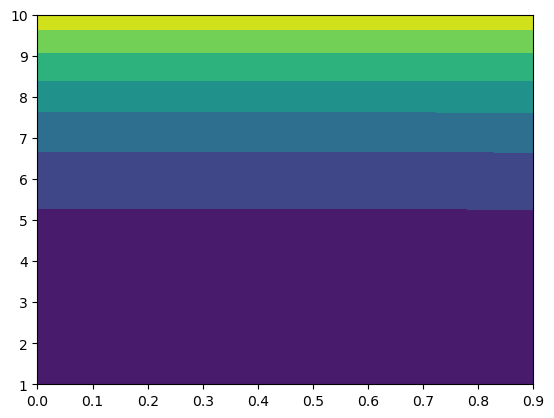

In [ ]:
#test
f=np.arange(0,1,0.1)
T=np.arange(1,11)


X,Y = np.meshgrid(f,T)
S=X**2+Y**3
plt.contourf(X,Y,S)